In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
# Round up numbers so that we don't leave out people who have died.
rounded_up = math.ceil()

In [17]:
df = pd.read_excel('Health_Science_Dataset.xlsx', header=1)

# String
for col_idx in [6, 7, 8, 9]:
    col_name = df.columns[col_idx]
    df[col_name] = df[col_name].astype(str)

# Dates
for col_idx in [0, 1, 2, 5]:
    col_name = df.columns[col_idx]
    df[col_name] = pd.to_datetime(df[col_name], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Year
df.iloc[:, 3] = pd.to_datetime(df.iloc[:, 3], format='%Y', errors='coerce')

# Integer
for col_idx in [4] + list(range(10, 16)):
    col_name = df.columns[col_idx]
    df[col_name] = df[col_name].apply(lambda x: int(x) if pd.notna(x) else x)

In [18]:
print(df.tail())

       Data As Of  Start Week    End Week  MMWRyear  MMWRweek  \
50395  11/02/2023  10/22/2023  10/28/2023      2023        43   
50396  11/02/2023  10/22/2023  10/28/2023      2023        43   
50397  11/02/2023  10/22/2023  10/28/2023      2023        43   
50398  11/02/2023  10/22/2023  10/28/2023      2023        43   
50399  11/02/2023  10/22/2023  10/28/2023      2023        43   

      Week Ending Date    Group    Indicator   Jurisdiction  \
50395       10/28/2023  By Week  Week-ending   HHS Region 9   
50396       10/28/2023  By Week  Week-ending  HHS Region 10   
50397       10/28/2023  By Week  Week-ending  HHS Region 10   
50398       10/28/2023  By Week  Week-ending  HHS Region 10   
50399       10/28/2023  By Week  Week-ending  HHS Region 10   

               Age Group  COVID-19 Deaths  Total Deaths  Pneumonia Deaths  \
50395  65 years and over             43.0        1970.0             128.0   
50396           All Ages             14.0         435.0              26.0   

In [19]:
North_Carolina= df[df['Jurisdiction'] == 'North Carolina']

In [20]:
print(North_Carolina.head())

     Data As Of  Start Week    End Week  MMWRyear  MMWRweek Week Ending Date  \
140  11/02/2023  12/29/2019  01/04/2020      2020         1       01/04/2020   
141  11/02/2023  12/29/2019  01/04/2020      2020         1       01/04/2020   
142  11/02/2023  12/29/2019  01/04/2020      2020         1       01/04/2020   
143  11/02/2023  12/29/2019  01/04/2020      2020         1       01/04/2020   
392  11/02/2023  01/05/2020  01/11/2020      2020         2       01/11/2020   

       Group    Indicator    Jurisdiction          Age Group  COVID-19 Deaths  \
140  By Week  Week-ending  North Carolina           All Ages              0.0   
141  By Week  Week-ending  North Carolina         0-17 years              0.0   
142  By Week  Week-ending  North Carolina        18-64 years              0.0   
143  By Week  Week-ending  North Carolina  65 years and over              0.0   
392  By Week  Week-ending  North Carolina           All Ages              0.0   

     Total Deaths  Pneumonia Dea

In [54]:
def avg_deaths_jurisdiction(df):
    avg_death = df.groupby('Jurisdiction')["COVID-19 Deaths"].mean()

    for Jurisdiction, mean_weight in avg_death.items():
        print(f"The mean COVID-19 deaths for {Jurisdiction} per week is: {math.ceil(mean_weight)}.")
    
    return
avg_deaths_jurisdiction(North_Carolina)

The mean COVID-19 deaths for North Carolina per week is: 97.


In [52]:
def avg_deaths_age_group(df):
    avg_death = df.groupby('Age Group')["COVID-19 Deaths"].mean()

    for age_group, mean_weight in avg_death.items():
        print(f"The mean United States COVID-19 deaths for {age_group} per week is: {math.ceil(mean_weight)}.")
    
    return
avg_deaths_age_group(df)

The mean United States COVID-19 deaths for 0-17 years per week is: 1.
The mean United States COVID-19 deaths for 18-64 years per week is: 103.
The mean United States COVID-19 deaths for 65 years and over per week is: 250.
The mean United States COVID-19 deaths for All Ages per week is: 322.


In [51]:
def avg_deaths_age_group(df):
    avg_death = df.groupby('MMWRweek')["COVID-19 Deaths"].mean()

    for age_group, mean_weight in avg_death.items():
        print(f"The mean United States COVID-19 deaths for {age_group} per week is: {math.ceil(mean_weight)}.")
    
    return
avg_deaths_age_group(df)

The mean United States COVID-19 deaths for 1 per week is: 308.
The mean United States COVID-19 deaths for 2 per week is: 331.
The mean United States COVID-19 deaths for 3 per week is: 335.
The mean United States COVID-19 deaths for 4 per week is: 306.
The mean United States COVID-19 deaths for 5 per week is: 259.
The mean United States COVID-19 deaths for 6 per week is: 217.
The mean United States COVID-19 deaths for 7 per week is: 176.
The mean United States COVID-19 deaths for 8 per week is: 138.
The mean United States COVID-19 deaths for 9 per week is: 108.
The mean United States COVID-19 deaths for 10 per week is: 89.
The mean United States COVID-19 deaths for 11 per week is: 77.
The mean United States COVID-19 deaths for 12 per week is: 73.
The mean United States COVID-19 deaths for 13 per week is: 88.
The mean United States COVID-19 deaths for 14 per week is: 136.
The mean United States COVID-19 deaths for 15 per week is: 182.
The mean United States COVID-19 deaths for 16 per wee

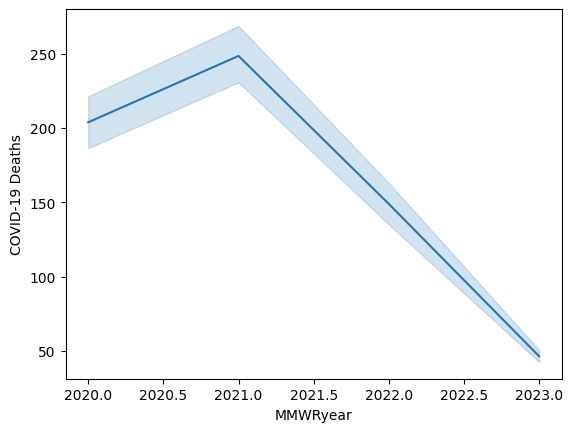

In [41]:
plt = sns.lineplot(data=df, x='MMWRyear', y='COVID-19 Deaths')

In [42]:
vaccinations = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_Jurisdiction_20240928.csv')

In [44]:
vaccinations.tail()

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,...,Dist_Bivalent_PFR,Dist_Bivalent_MOD,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
38483,12/13/2020,51,AS,3900,0,0,0,NaN,0,7003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38484,12/13/2020,51,VI,975,0,0,0,NaN,0,931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38485,12/13/2020,51,MP,4875,0,0,0,NaN,0,8570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38486,12/13/2020,51,US,13650,0,0,0,NaN,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38487,12/13/2020,51,GU,3900,0,0,0,NaN,0,2353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\aidan\AppData\Local\Temp\ipykernel_26888\3348739523.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_csv_data['Distributed_Scaled'] = filtered_csv_data['Distributed'] / 10000  # Scale down to 'in tens of thousands'
C:\Users\aidan\AppData\Local\Temp\ipykernel_26888\3348739523.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=filtered_excel_data, x='End Week', y='COVID-19 Deaths', label='COVID-19 Deaths', marker='o', ci=None)


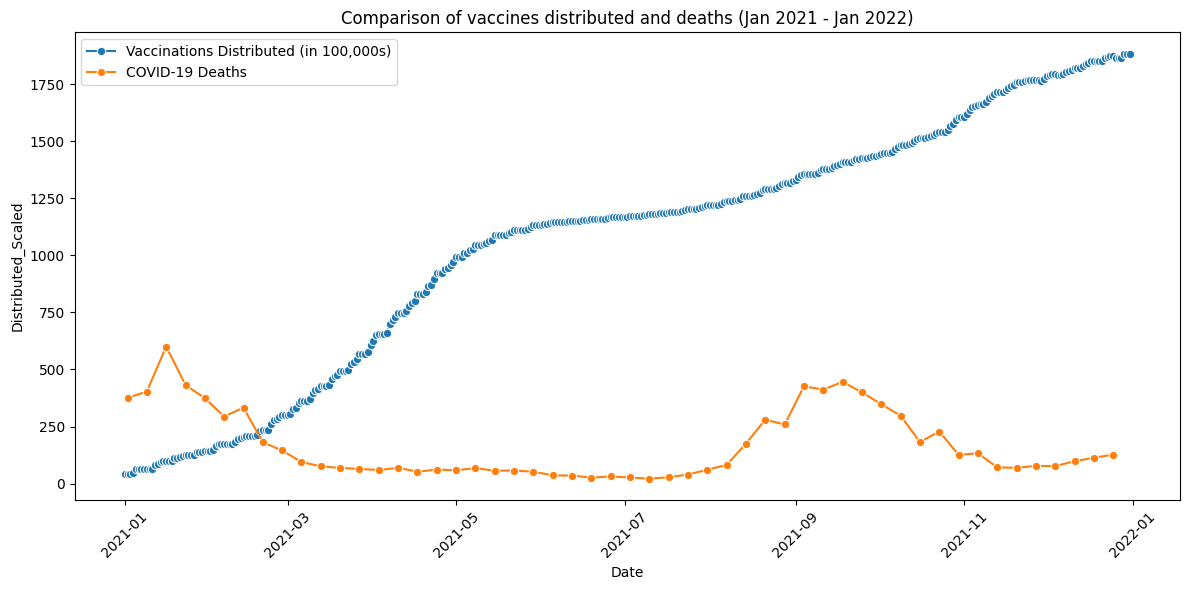

In [73]:
# Convert the dates to datetime so that they can be graphed together.

vaccinations['Date'] = pd.to_datetime(vaccinations['Date'])
df['End Week'] = pd.to_datetime(df['End Week'])
start_date = '2021-01-01'
end_date = '2022-01-01'

# Filtering data
filtered_csv_data = vaccinations[(vaccinations['Date'] >= start_date) & (vaccinations['Date'] < end_date) & (vaccinations['Location'] == 'NC')]
filtered_csv_data['Distributed_Scaled'] = filtered_csv_data['Distributed'] / 10000  # Scale down to 'in tens of thousands'


filtered_excel_data = df[(df['End Week'] >= start_date) & (df['End Week'] < end_date) & (df['Jurisdiction'] == 'North Carolina')]

# Creating the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_csv_data, x='Date', y='Distributed_Scaled', label='Vaccinations Distributed (in 100,000s)', marker='o')
sns.lineplot(data=filtered_excel_data, x='End Week', y='COVID-19 Deaths', label='COVID-19 Deaths', marker='o', ci=None)
plt.title('Comparison of vaccines distributed and deaths (Jan 2021 - Jan 2022)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



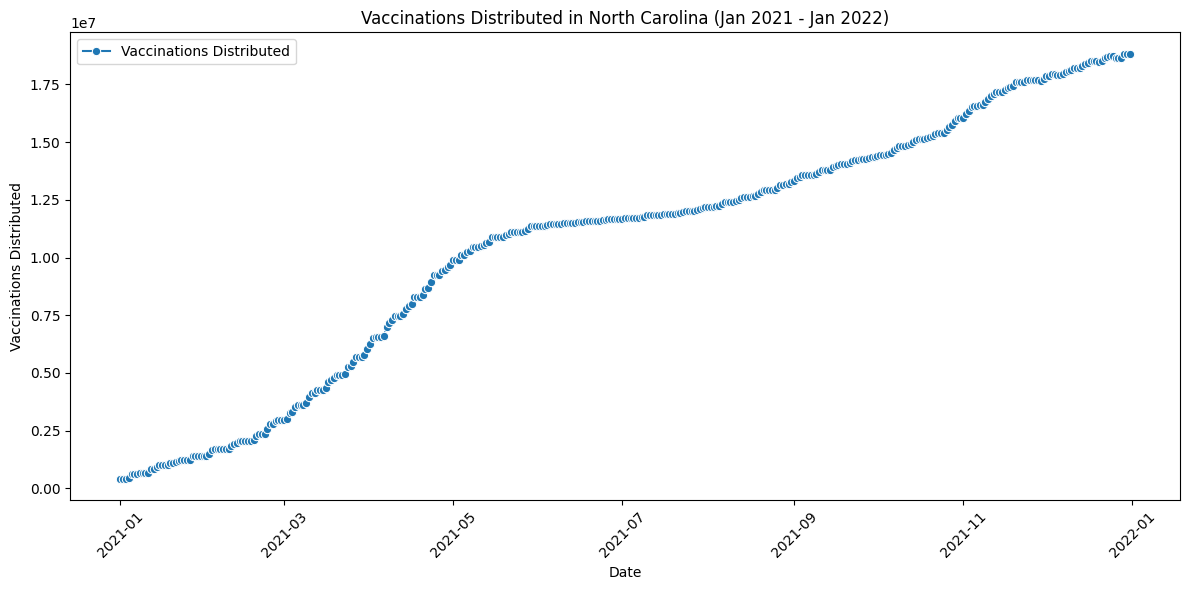

In [66]:
# Plotting Vaccinations Distributed

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_csv_data, x='Date', y='Distributed', label='Vaccinations Distributed', marker='o')
plt.title('Vaccinations Distributed in North Carolina (Jan 2021 - Jan 2022)')
plt.xlabel('Date')
plt.ylabel('Vaccinations Distributed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\aidan\AppData\Local\Temp\ipykernel_26888\923042870.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=filtered_excel_data, x='End Week', y='COVID-19 Deaths', label='COVID-19 Deaths', marker='o', ci=None)


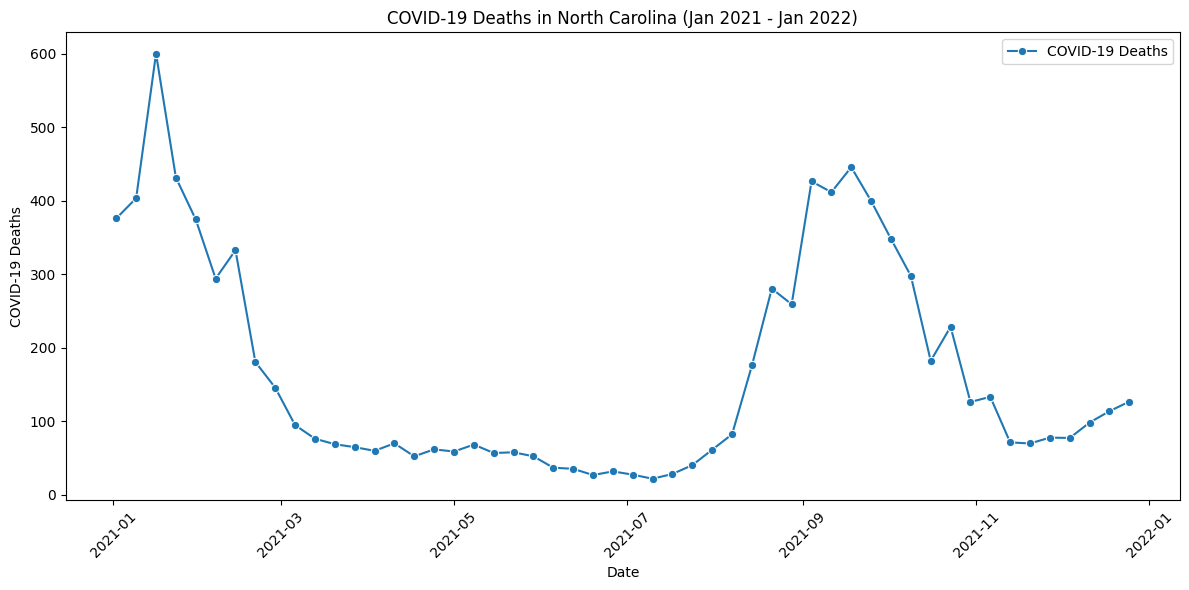

In [68]:
# Plotting COVID-19 Deaths

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_excel_data, x='End Week', y='COVID-19 Deaths', label='COVID-19 Deaths', marker='o', ci=None)
plt.title('COVID-19 Deaths in North Carolina (Jan 2021 - Jan 2022)')
plt.xlabel('Date')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()